## Assignment1
### Generate N samples from a distribution of your choice, but not a Gaussian with a chosen mean μ and standard deviation σ: N(μ, σ) and calculate the mean of each sample (all samples should have the same size n).

### Assess the validity of the Z-test: If the samples are drawn from the distribution you are testing the z-values you calculate should follow a N(0,1) distribution (a Gaussian with mean 0 and standard deviation 1). Show that the distribution of z -statistics (find the formula in a statistics book or in last week’s slides) that you calculated (one for each sample) is indeed consistent with N(0,1).

In [35]:
import numpy as np
import pylab as pl
import scipy as sp
from scipy import stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [36]:
np.random.seed(999)

In [37]:
mymean = 100
mystd = 14
mysample = sp.stats.poisson.rvs(mymean, size=1000)

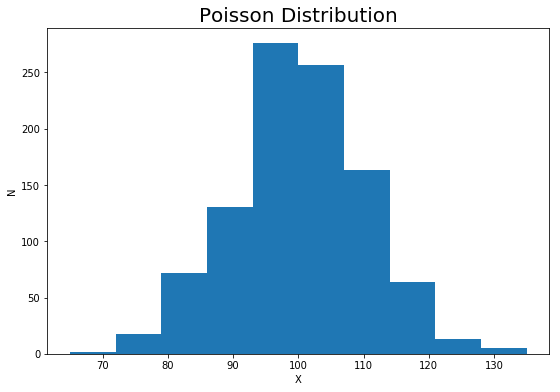

In [38]:
#now plot the original distribution
pl.figure(figsize = (9,6))
pl.hist(mysample)
pl.xlabel("X")
pl.ylabel("N")
pl.title("Poisson Distribution", fontsize = 20)
pl.show()

###            figure 1 Poisson distribution

In [39]:
#generate samples
#z-test
mysamples = []
mysamplesMean = np.zeros(500)
mysamplesZ = np.zeros(500)

for i in range(500):
    samples = np.random.choice(mysample, 100)
    mysamples.append(samples)
    #calculate the mean of each sample
    mysamplesMean[i] = samples.mean()
    #according to z-test formula: Z=(u-u0)/(s/sqrt(n))
    Z = (samples.mean() - mysample.mean()) / (mysample.std() / 10.)
    mysamplesZ[i] = Z

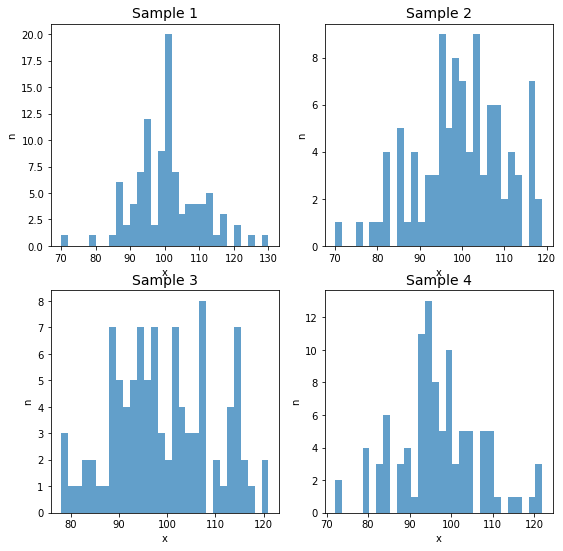

In [40]:
#plot 4 samples
pl.figure(figsize = (9,9))
for i in range(1, 5):
    pl.subplot(220+i)
    pl.hist(mysamples[i-1], bins = 30, alpha=0.7)
    plt.ylabel('n')
    plt.xlabel('x')
    plt.title('Sample %d'%(i), fontsize = 14)

### figure 2 plot the samples

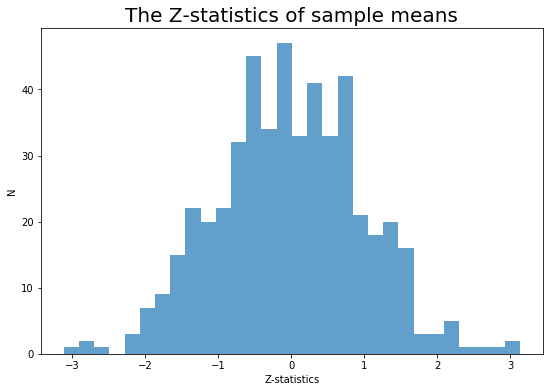

In [41]:
#plot the distribution of z-statistics
pl.figure(figsize = (9,6))
pl.hist(mysamplesZ, bins = 30, alpha=0.7)
pl.ylabel('N')
pl.xlabel('Z-statistics')
pl.title('The Z-statistics of sample means', fontsize = 20)
pl.show()

### figure 3 plot the distribution of z-statistics

## Conclusion: the distribution of z-statistics is indeed consistent with N(0,1).

## fit the z-statistics with a gaussian model and assess the goodness of fit with a simple test (AD or KS).


## plots need have caption, axis labels, etx and comment your figures and test results appropriately (to demonstrate your understanding).

In [42]:
sp.stats.kstest(mysamplesZ, "norm")

KstestResult(statistic=0.025208321123719957, pvalue=0.90842948632134812)

In [43]:
sp.stats.anderson(mysamplesZ, "norm")

AndersonResult(statistic=0.21731244479656198, critical_values=array([ 0.571,  0.651,  0.781,  0.911,  1.083]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))